In [1]:
import sys, os

In [2]:
print("executable:", sys.executable)

executable: C:\coding\leveraged-etf-simulator\.venv\Scripts\python.exe


In [3]:
print("cwd:", os.getcwd())

cwd: C:\coding\leveraged-etf-simulator\notebooks


In [4]:
import certifi, os

In [5]:
os.environ["SSL_CERT_FILE"] = certifi.where()

In [6]:
os.environ["REQUESTS_CA_BUNDLE"] = certifi.where()

In [7]:
import sys

In [8]:
from pathlib import Path

In [9]:
PROJECT_ROOT = Path().resolve().parent

In [10]:
sys.path.append(str(PROJECT_ROOT / "src"))

In [11]:
sys.executable

'C:\\coding\\leveraged-etf-simulator\\.venv\\Scripts\\python.exe'

In [12]:
from fetch_data import fetch_prices

In [13]:
ticker = input("ticker입력:")

ticker입력: NVDA


In [14]:

prices = fetch_prices(ticker)

[*********************100%***********************]  1 of 1 completed


In [15]:
prices.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2026-01-07,189.110001,191.369995,186.559998,188.570007,153543200
2026-01-08,185.039993,189.550003,183.710007,189.110001,172457000
2026-01-09,184.860001,186.339996,183.669998,185.080002,131327500
2026-01-12,184.940002,187.119995,183.020004,183.220001,137968500
2026-01-13,185.809998,188.110001,183.399994,185.000000,160128900


In [16]:
prices.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 22 entries, 2026-01-07 to 2026-02-06
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   22 non-null     float64
 1   (High, NVDA)    22 non-null     float64
 2   (Low, NVDA)     22 non-null     float64
 3   (Open, NVDA)    22 non-null     float64
 4   (Volume, NVDA)  22 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.0 KB


In [17]:
prices.columns = prices.columns.get_level_values(0)

In [18]:
prices.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2026-01-07,189.110001,191.369995,186.559998,188.570007,153543200
2026-01-08,185.039993,189.550003,183.710007,189.110001,172457000
2026-01-09,184.860001,186.339996,183.669998,185.080002,131327500
2026-01-12,184.940002,187.119995,183.020004,183.220001,137968500
2026-01-13,185.809998,188.110001,183.399994,185.000000,160128900


In [19]:
prices.Close

Date
2026-01-07    189.110001
2026-01-08    185.039993
2026-01-09    184.860001
2026-01-12    184.940002
2026-01-13    185.809998
2026-01-14    183.139999
2026-01-15    187.050003
2026-01-16    186.229996
2026-01-20    178.070007
2026-01-21    183.320007
2026-01-22    184.839996
2026-01-23    187.669998
2026-01-26    186.470001
2026-01-27    188.520004
2026-01-28    191.520004
2026-01-29    192.509995
2026-01-30    191.130005
2026-02-02    185.610001
2026-02-03    180.339996
2026-02-04    174.190002
2026-02-05    171.880005
2026-02-06    185.410004
Name: Close, dtype: float64

In [20]:
returns = prices["Close"].pct_change()

In [21]:
import pandas as pd
returns.index = pd.to_datetime(returns.index)
print(returns)

Date
2026-01-07         NaN
2026-01-08   -0.021522
2026-01-09   -0.000973
2026-01-12    0.000433
2026-01-13    0.004704
2026-01-14   -0.014370
2026-01-15    0.021350
2026-01-16   -0.004384
2026-01-20   -0.043817
2026-01-21    0.029483
2026-01-22    0.008291
2026-01-23    0.015311
2026-01-26   -0.006394
2026-01-27    0.010994
2026-01-28    0.015913
2026-01-29    0.005169
2026-01-30   -0.007168
2026-02-02   -0.028881
2026-02-03   -0.028393
2026-02-04   -0.034102
2026-02-05   -0.013261
2026-02-06    0.078718
Name: Close, dtype: float64


In [22]:
returns.head()

Date
2026-01-07         NaN
2026-01-08   -0.021522
2026-01-09   -0.000973
2026-01-12    0.000433
2026-01-13    0.004704
Name: Close, dtype: float64

In [23]:
leveraged_2x = returns * 2

In [24]:
leveraged_2x.head()

Date
2026-01-07         NaN
2026-01-08   -0.043044
2026-01-09   -0.001945
2026-01-12    0.000866
2026-01-13    0.009408
Name: Close, dtype: float64

In [25]:
cum_1x = (1+returns).cumprod()

In [26]:
cum_2x = (1+leveraged_2x).cumprod()

In [27]:
cum_1x.tail(), cum_2x.tail()

(Date
 2026-02-02    0.981492
 2026-02-03    0.953625
 2026-02-04    0.921104
 2026-02-05    0.908889
 2026-02-06    0.980435
 Name: Close, dtype: float64,
 Date
 2026-02-02    0.957792
 2026-02-03    0.903403
 2026-02-04    0.841787
 2026-02-05    0.819461
 2026-02-06    0.948473
 Name: Close, dtype: float64)

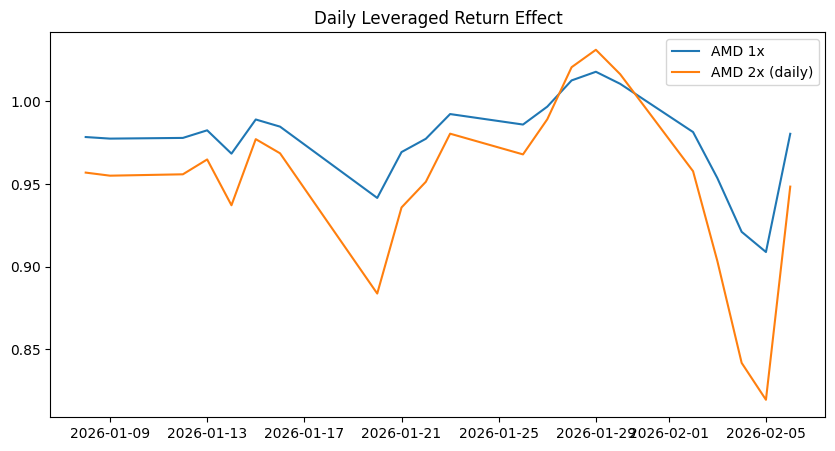

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(cum_1x.index, cum_1x, label="AMD 1x")
plt.plot(cum_2x.index, cum_2x, label="AMD 2x (daily)")

plt.legend()
plt.title("Daily Leveraged Return Effect")
plt.show()

In [29]:
print("1x last:", cum_1x.iloc[-1])
print("2x last:", cum_2x.iloc[-1])
print("3x last:", cum_3x.iloc[-1] if "cum_3x" in globals() else "no 3x yet")

1x last: 0.9804346838543683
2x last: 0.948472734274139
3x last: no 3x yet


In [30]:
expected_2x = 1 + 2 * (cum_1x.iloc[-1] - 1)   # '누적수익률에 2배' 착각 버전
print("expected 2x (wrong idea):", expected_2x)
print("actual 2x (daily reset):", cum_2x.iloc[-1])

expected 2x (wrong idea): 0.9608693677087365
actual 2x (daily reset): 0.948472734274139


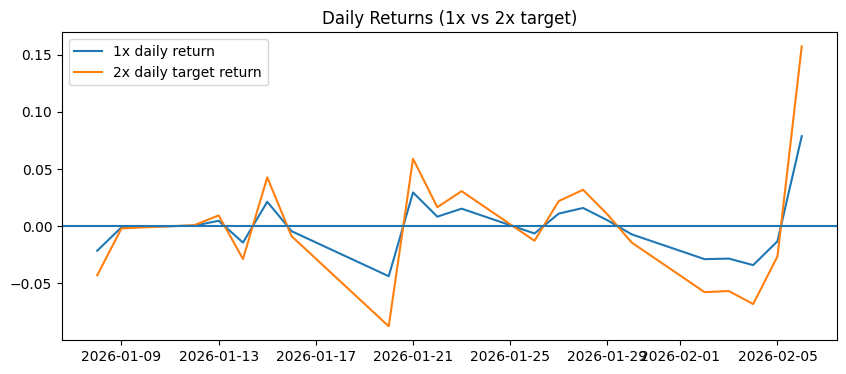

In [31]:
r1 = returns
r2 = returns * 2

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(r1.index, r1, label="1x daily return")
plt.plot(r2.index, r2, label="2x daily target return")
plt.axhline(0)
plt.legend()
plt.title("Daily Returns (1x vs 2x target)")
plt.show()

In [32]:
import pandas as pd

date = input("0000-00-00 형태로 날짜 입력:").strip()
base_date = pd.to_datetime(date)

prices.index = pd.to_datetime(prices.index)

if base_date not in prices.index:
    raise ValueError(f"{date}는 데이터에 없는 거래일입니다. (주말/휴장일)")


close_ticker = prices["Close"]
returns = close_ticker.pct_change().fillna(0)
leveraged_2x = 2 * returns

shareprice = float(close_ticker.loc[base_date])
shares = int(input("몇 주 구매할지 입력:"))

#누적(첫날)
cum_1x = (1+returns).cumprod()
cum_2x = (1+leveraged_2x).cumprod()


#기준일을 1로 리베이스
cum_from_base_1x = cum_1x / cum_1x.loc[base_date]
cum_from_base_2x = cum_2x / cum_2x.loc[base_date]

final_r_1x = float(cum_from_base_1x.loc[base_date:].iloc[-1] -1)
final_r_2x = float(cum_from_base_2x.loc[base_date:].iloc[-1] -1)

initial_capital = shares * float(shareprice)

total_1x = (cum_from_base_1x * initial_capital).loc[base_date:]
total_2x = (cum_from_base_2x * initial_capital).loc[base_date:]

print(f"""
[기준일 {date}] {ticker} {shares}주 매수
매수가: {shareprice:.2f}, 초기자본: {initial_capital:.2f}

기본형
- 누적 수익률(기준일 이후): {final_r_1x:.2%}
- 최종 자산: {total_1x.iloc[-1]:,.2f}

레버리지(2x)
- 누적 수익률(기준일 이후): {final_r_2x:.2%}
- 최종 자산: {total_2x.iloc[-1]:,.2f}
""")

0000-00-00 형태로 날짜 입력: 2026-01-26
몇 주 구매할지 입력: 3



[기준일 2026-01-26] NVDA 3주 매수
매수가: 186.47, 초기자본: 559.41

기본형
- 누적 수익률(기준일 이후): -0.57%
- 최종 자산: 556.23

레버리지(2x)
- 누적 수익률(기준일 이후): -2.01%
- 최종 자산: 548.14



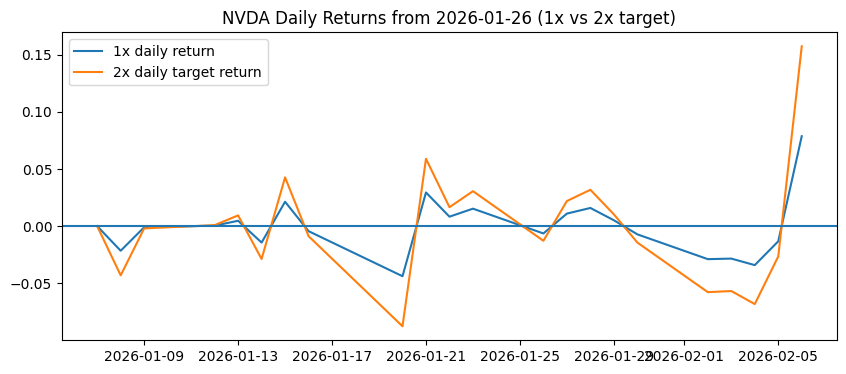

In [34]:
r1 = returns
r2 = returns * 2

import matplotlib.pyplot as plt

r1_plot = r1.loc[base_date:]
r2_plot = r2.loc[base_date:]

plt.figure(figsize=(10,4))
plt.plot(r1.index, r1, label="1x daily return")
plt.plot(r2.index, r2, label="2x daily target return")
plt.axhline(0)
plt.legend()
plt.title(f"{ticker} Daily Returns from {base_date.date()} (1x vs 2x target)")
plt.show()